# Dimensionality Reduction with PCA

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
print(os.getcwd())

c:\Users\ntama\Documentos\Data Science\Codecademy\projects\Date-A-Scientist - Final Project\OKCupid-Date-A-Scientist-Starter\date-a-scientist-project\notebooks


## Importing predictors and target - train, test and validation subsets

In [3]:
X_train = pd.read_csv("../data/X_train.csv", index_col=False)
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]

X_val = pd.read_csv("../data/X_val.csv", index_col=False)
X_val = X_val.loc[:, ~X_val.columns.str.contains('^Unnamed')]

X_test = pd.read_csv("../data/X_test.csv", index_col=False)
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

y_train = pd.read_csv("../data/y_train.csv", index_col=False)
y_train = y_train.loc[:, ~y_train.columns.str.contains('^Unnamed')]

y_val = pd.read_csv("../data/y_val.csv", index_col=False)
y_val = y_val.loc[:, ~y_val.columns.str.contains('^Unnamed')]

y_test = pd.read_csv("../data/y_test.csv", index_col=False)
y_test = y_test.loc[:, ~y_test.columns.str.contains('^Unnamed')]

## PCA for 95% of the variance explained

In [4]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

### Getting number of components to explain 95% of variance

In [5]:
print(f"Number of selected components: {pca.n_components_}")


Number of selected components: 11


### Plotting Number of components vs. accumulated explained variance

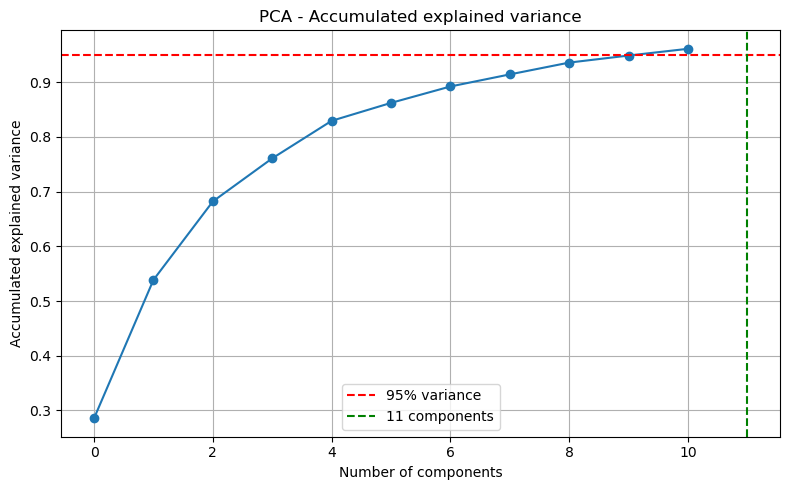

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Accumulated explained variance')
plt.title('PCA - Accumulated explained variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=pca.n_components_, color='g', linestyle='--', label=f'{pca.n_components_} components')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component # {i+1}: {var:.4f}")


Component # 1: 0.2858
Component # 2: 0.2528
Component # 3: 0.1434
Component # 4: 0.0787
Component # 5: 0.0685
Component # 6: 0.0328
Component # 7: 0.0300
Component # 8: 0.0221
Component # 9: 0.0216
Component # 10: 0.0129
Component # 11: 0.0123


In [8]:
X_train_pca = pd.DataFrame(X_train_pca)
X_val_pca = pd.DataFrame(X_val_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [9]:
X_train_pca.to_csv('X_train_pca.csv')
X_val_pca.to_csv('X_val_pca.csv')
X_test_pca.to_csv('X_test_pca.csv')